### 로지스틱 회귀(Losgistic Regression) -분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt

- sigmoid 함수 (먼저 알아야할 개념)

In [2]:
def sigmoid(x, a=1, b=0):
    return (1. / (1 + np.exp(-a*(x-b))))

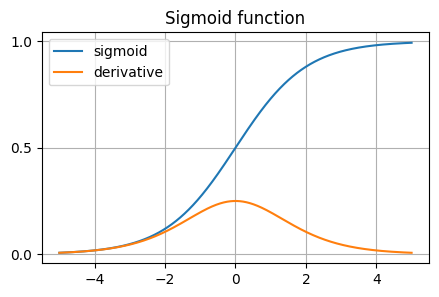

In [5]:
xs = np.linspace(-5, 5, 1000)
ys = sigmoid(xs)
plt.figure(figsize=(5,3))
plt.plot(xs, ys, label='sigmoid')
plt.plot(xs, ys*(1-ys), label='derivative') # 미분...하면 평균이 0.25된다
plt.title('Sigmoid function')
plt.yticks([0., 0.5, 1])
plt.grid(), plt.legend()
plt.show()

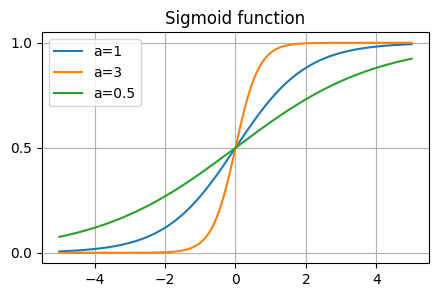

In [6]:
# a값에 따른 변화
y3 = sigmoid(xs, a=3)
y_half = sigmoid(xs, a=0.5)
plt.figure(figsize=(5,3))
plt.plot(xs, ys, label='a=1')   # a=1일때(기존)
plt.plot(xs, y3, label='a=3')   # 가팔라짐
plt.plot(xs, y_half, label='a=0.5') # 완만해짐
plt.title('Sigmoid function')
plt.yticks([0., 0.5, 1])
plt.grid(), plt.legend()
plt.show()

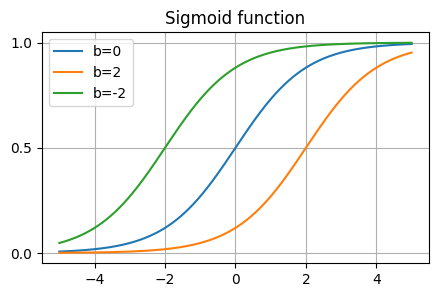

In [7]:
# b값에 따른 변화
y_plus2 = sigmoid(xs, b=2)
y_minus2 = sigmoid(xs, b=-2)
plt.figure(figsize=(5,3))
plt.plot(xs, ys, label='b=0')   # b=0일때(기존)
plt.plot(xs, y_plus2, label='b=2')  # 그래프가 오른쪽으로 2만큼 이동(+2)
plt.plot(xs, y_minus2, label='b=-2')    # 그래프가 왼쪽으로 2만큼 이동(-2)
plt.title('Sigmoid function')
plt.yticks([0., 0.5, 1])
plt.grid(), plt.legend()
plt.show()

- 이진 분류

In [8]:
import pandas as pd
pima = pd.read_csv('../01.Intro/pima-indians-diabetes.csv', skiprows=9, header=None)
pima.columns = ['P','G','BP','S','I','BMI','D','Age','Target']
pima.head()

,P,G,BP,S,I,BMI,D,Age,Target
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
y = pima.Target.values
X = pima.iloc[:, :-1].values

In [10]:
# 로지스틱 회귀를 사용하려면 데이터 표준화/정규화 해야 함
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_std, y, stratify=y, test_size=0.2, random_state=2023
)

In [12]:
#파라메터값 조절할 수 있지만 여기선 생략
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=2023)
lrc.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 2023,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [14]:
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)   # 이전 파일작업보다 결과 좋음

0.7987012987012987

-  Logistic Regression의 원리 (y = WX + b) 
-       W : weight, X: _test값

In [15]:
# 선형회귀의 가중치(계수)-coefficient     * y = WX + b 에서 W값
lrc.coef_   # X = ['P','G','BP','S','I','BMI','D','Age']의 각 값

array([[ 0.43899154,  1.10852013, -0.21920447,  0.0610045 , -0.21882506,
         0.67110797,  0.21628174,  0.13662499]])

In [16]:
# 선형회귀의 바이어스(절편)  * y = WX + b 에서 b값
lrc.intercept_

array([-0.83697953])

In [18]:
X_test[0], y_test[0]    # 로지스틱회귀 : y = sigmoid(WX + b)

(array([-8.44885053e-01, -3.78365371e+00, -5.71502470e-02,  9.07269925e-01,
        -6.92890572e-01,  9.41978774e-04, -2.50296268e-01, -9.56461683e-01]),
 0)

In [19]:
# X_test[0] = 1이 될 확률, sigmoid함수 적용 전 값
val = np.dot(lrc.coef_, X_test[0])  + lrc.intercept_
val[0]

-5.366815192951741

In [20]:
# sigmoid합수 적용
sigmoid(val)[0] # 1이 될 확률 = 0.004647279406231874

0.004647279406231874

In [21]:
lrc.predict_proba(X_test[:1])   # [1- 0.0046.., 0.0046..] --> 총 합은 1이 됨

array([[0.99535272, 0.00464728]])

- 다중분류

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_std, iris.target, stratify=iris.target, test_size=0.2, random_state=2023
)

In [24]:
lrc = LogisticRegression(random_state=2023)
lrc.fit(X_train, y_train)
lrc.score(X_test, y_test)   # 값 똑같음

0.9666666666666667

In [25]:
lrc.predict_proba(X_test[:1])   # [setosa, ver, vir]

array([[3.30286696e-05, 7.71018326e-03, 9.92256788e-01]])

In [26]:
lrc.coef_, lrc.intercept_
# se = -1.04982073*sl,  1.07867605*sw, -1.77729719*pl, -1.658877*pw   -0.17
# ve = 0.58058167*sl, -0.40675824*sw, -0.39205087*pl, -0.72718*pw     +1.85
# vi = 0.46923906*sl, -0.67191782*sw,  2.16934806*pl,  2.38605711*pw  -1.68

(array([[-1.04982073,  1.07867605, -1.77729719, -1.6588771 ],
        [ 0.58058167, -0.40675824, -0.39205087, -0.72718   ],
        [ 0.46923906, -0.67191782,  2.16934806,  2.38605711]]),
 array([-0.17112899,  1.8490486 , -1.67791961]))

In [28]:
val = np.dot(lrc.coef_, X_test[0]) + lrc.intercept_
val

array([-5.25442751,  0.19849377,  5.05593374])

In [29]:
sigmoid(val) # se, ve, vi가 1이 될 확률 (*총합이 1이 아님 -> softmax)

array([0.00519718, 0.54946115, 0.99366892])

In [30]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [32]:
softmax(np.array([0.1, 1, 2]))  # 합이 1이 되게 함

array([0.09856589, 0.24243297, 0.65900114])

In [33]:
# 다중 분류에서 predict_proba() 값은 softmax() 적용 값
softmax(val)

array([3.30286696e-05, 7.71018326e-03, 9.92256788e-01])

In [34]:
# 다중 분류에서 predict_proba() 값은 softmax() 적용 값
lrc.predict_proba(X_test[:1])   # 위 값과 동일하게 나옴

array([[3.30286696e-05, 7.71018326e-03, 9.92256788e-01]])